# **Sales Prediction Using Python**

#**Task To Be Done**

This Task is assigned by: CodeAlpha. Which is a leading software develpoment company

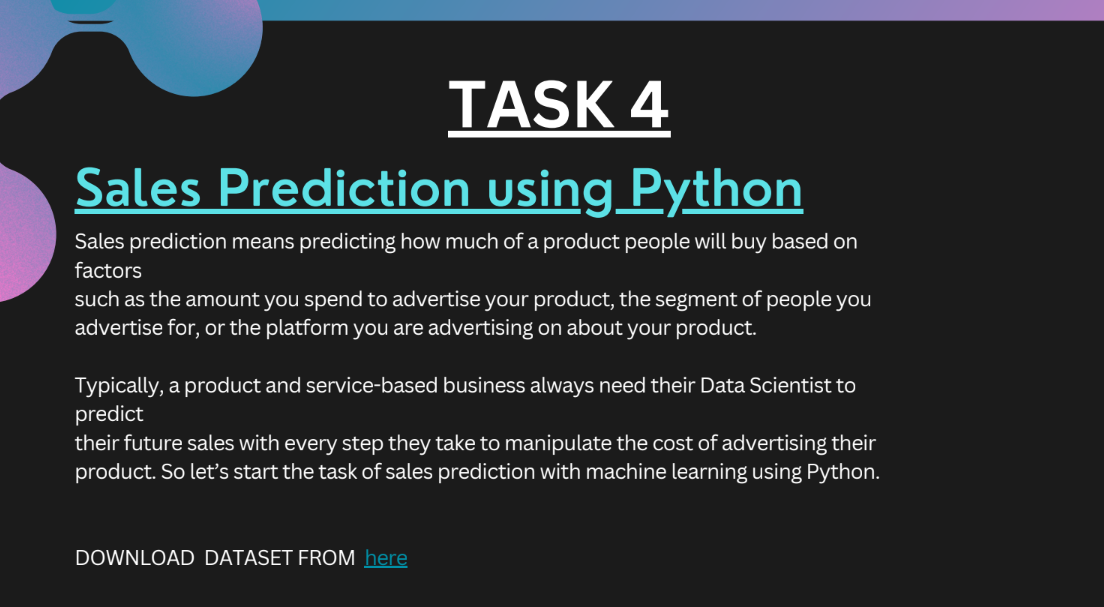

# **Dataset Overview**

The advertising dataset consists of variables representing advertising spending across different media channels: *TV*, *radio*, and *newspaper*. Each entry shows the budget allocated to each platform, with an associated *sales* figure indicating the product’s sales outcome. This dataset allows for analysis of the effectiveness of advertising expenditure on each medium and its relationship with sales. By exploring this data, we can understand which advertising channel has the most significant impact on sales and build predictive models to estimate future sales based on ad spending.

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# **Downloading The Dataset**

In [2]:
!pip install Kaggle
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/bumba5341/advertisingcsv/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: naglaareda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/bumba5341/advertisingcsv


100%|██████████| 2.26k/2.26k [00:00<00:00, 1.43MB/s]

# **Loading The Data**

In [4]:
# Load the 'accident cleaned data.csv' dataset
df =  pd.read_csv('/content/advertisingcsv/Advertising.csv')

# Check the first few rows
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# **EDA**

In [5]:
# Dropping Unwanted Columns
df = df.drop(columns = "Unnamed: 0", axis = 1)
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [6]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Check for missing values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
# Check for duplicate values
df.duplicated().sum()

0

In [9]:
print(df.shape)

(200, 4)


In [10]:
# Display stats about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


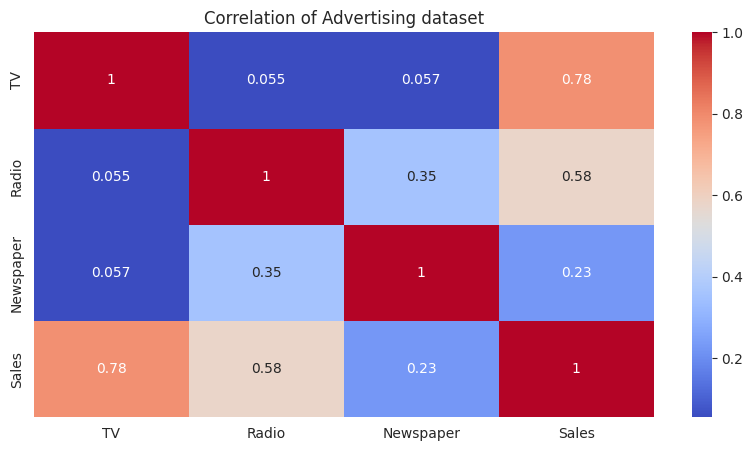

In [11]:
# Check Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation of Advertising dataset")
plt.show()


From the correlation heatmap of the advertising dataset, we observe:

- TV and Sales: Strong positive correlation (0.78) indicating that increased TV advertising spend is associated with higher sales.
- Radio and Sales: Moderate positive correlation (0.58), suggesting a significant but weaker impact of radio advertising on sales.
- Newspaper and Sales: Low correlation (0.23) with sales, implying that newspaper advertising has a minimal effect on sales.
- Other Relationships: Minimal correlation among TV, radio, and newspaper expenditures, suggesting they operate independently.

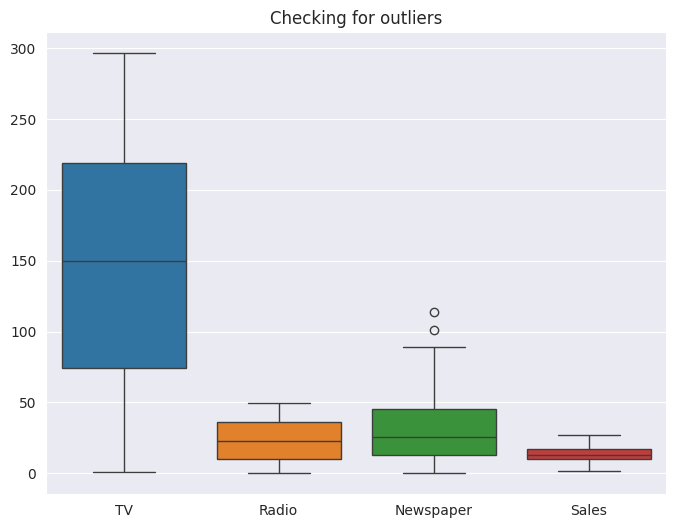

In [14]:
# Checking for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Checking for outliers")
plt.show()

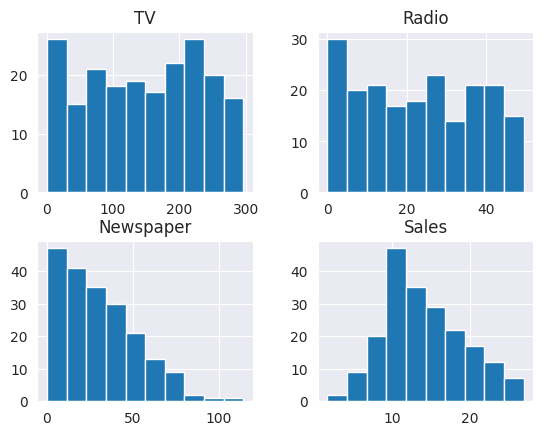

In [16]:
# Histogram
df.hist()
plt.show()

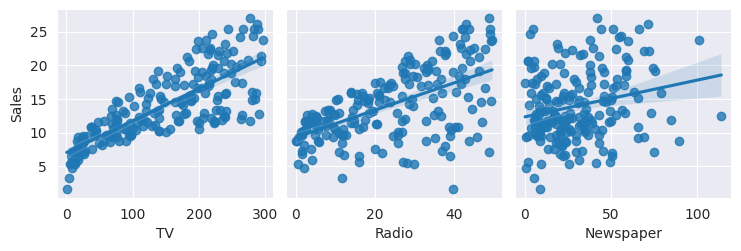

In [19]:
# Pair plot
sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="Dark2")
plt.show()

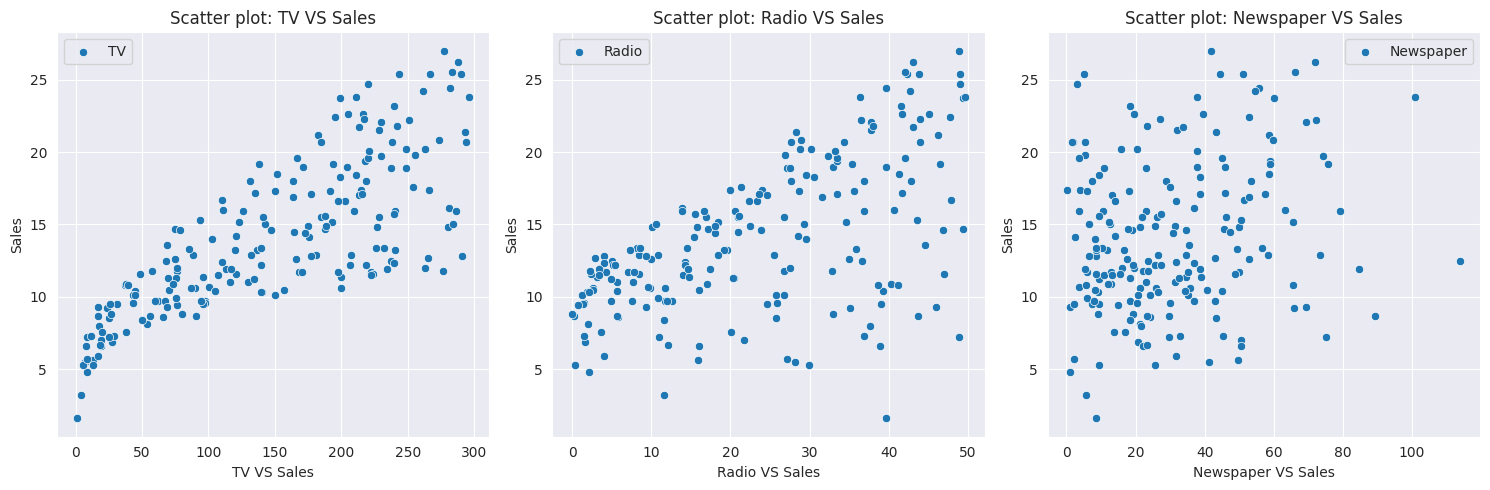

In [20]:
# Scatterplot
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

# **Model Training**

## Label Encoding

In [23]:
le = LabelEncoder()
y= le.fit_transform(y)

## Train-Test-Split

In [24]:
# Split the dataset into features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

In [26]:
# MinMax Scalar
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [27]:
# Initialize the StandardScaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define and Train Models

Linear Regression
Mean Squared Error: 3.174097353976106
R2 Score: 0.8994380241009119
Accuracy (R² as %): 89.9438024100912%
Cross-Validation R2: 0.8594884313276514


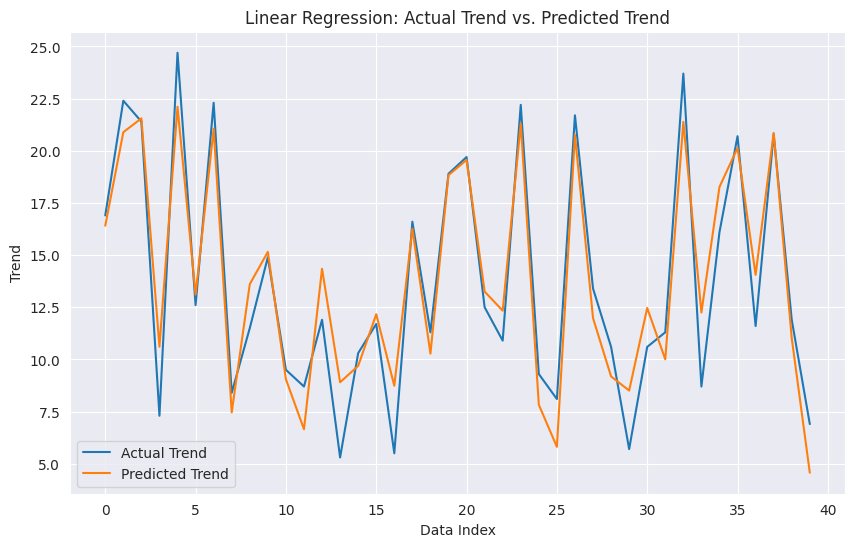


--------------------------------------------------

Ridge Regression
Mean Squared Error: 3.194155892207962
R2 Score: 0.8988025280800618
Accuracy (R² as %): 89.88025280800618%
Cross-Validation R2: 0.8596615496108058


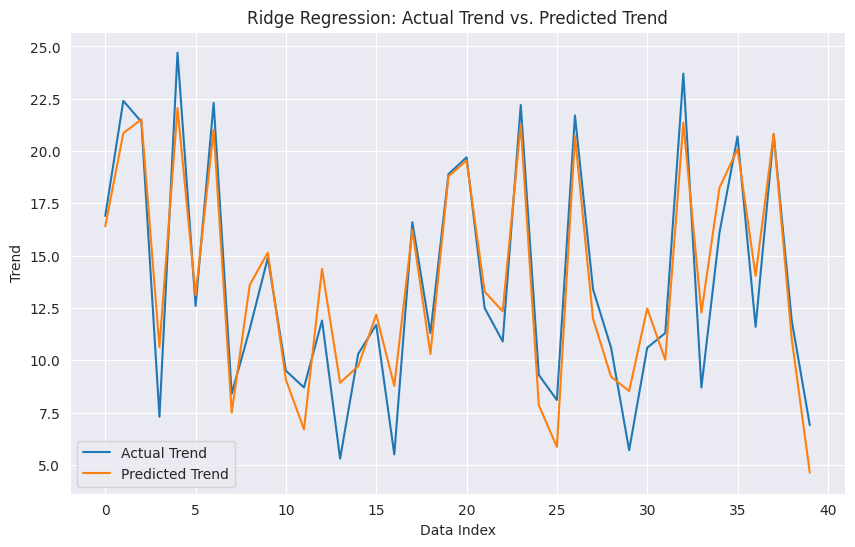


--------------------------------------------------

Lasso Regression
Mean Squared Error: 5.74467983106347
R2 Score: 0.8179966490329236
Accuracy (R² as %): 81.79966490329235%
Cross-Validation R2: 0.7807865941698354


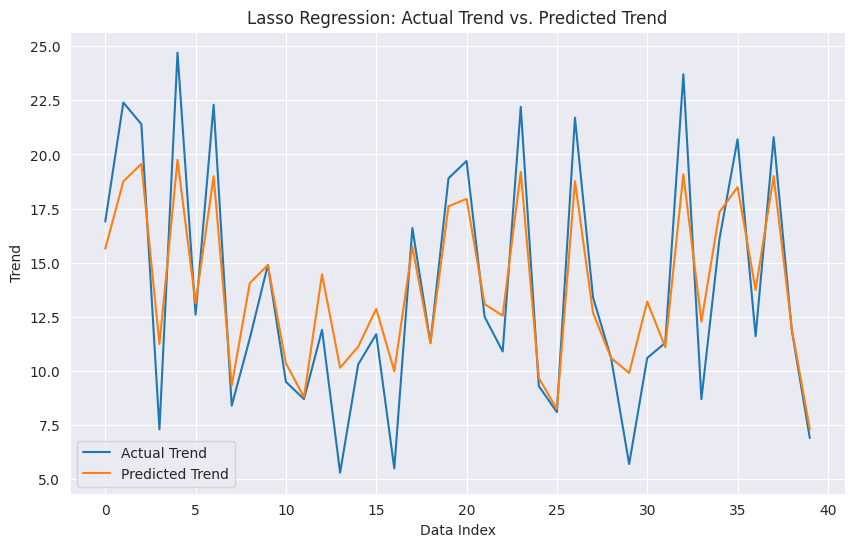


--------------------------------------------------



In [29]:
# Define the models to be evaluated
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Iterate over the models for training, evaluation, and visualization
for name, model in models.items():

    # Train the model using the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions using the scaled test data
    y_pred = model.predict(X_test_scaled)

    # Calculate Mean Squared Error (MSE) and R^2 score for the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate the accuracy (R^2 score is commonly used for regression)
    accuracy = r2 * 100  # R^2 as a percentage

    # Perform cross-validation to evaluate model performance on training data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    # Print model evaluation metrics
    print(f"{name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print(f"Accuracy (R² as %): {accuracy}%")  # Showing R² as percentage for "accuracy"
    print(f"Cross-Validation R2: {cv_scores.mean()}")

    # Plot Actual vs Predicted trends for visual comparison
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()

    # Add an empty line for readability between model results
    print("\n" + "-"*50 + "\n")